<a href="https://www.kaggle.com/code/pachecopacheco4/survival-titanic?scriptVersionId=148563285" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # Predicting survivals Titanic (decission tree, random forests and xgboost for classification)

In this case we are going to use titanic/train data in order to explore possible models. 

**ORIGINAL DATA**

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

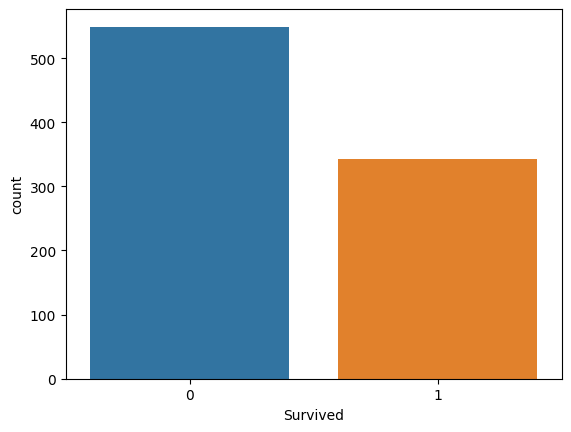

In [2]:
sns.countplot(x=titanic['Survived'],data=titanic)

## Analyzing categorical and numerical variables 

In [3]:
#Control cardinality if titanic[cname].nunique() < 10
categorical_cols = [cname for cname in titanic.columns if titanic[cname].dtype == "object"]
#Removing unuseful variables
categorical_cols.remove('Name')
numerical_cols = [cname for cname in titanic.columns if titanic[cname].dtype in ['int64', 'float64']]
#Removing unuseful variables
numerical_cols.remove('Survived')
numerical_cols.remove('PassengerId')

### Categorical 

In [4]:
titanic[categorical_cols].head()

,Sex,Ticket,Cabin,Embarked
0,male,A/5 21171,NaN,S
1,female,PC 17599,C85,C
2,female,STON/O2. 3101282,NaN,S
3,female,113803,C123,S
4,male,373450,NaN,S


We are going to see how each of them is related with the variable to predict.

<Axes: xlabel='Sex', ylabel='count'>

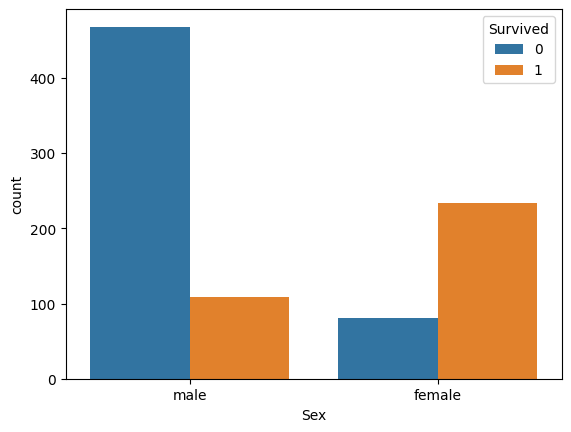

In [5]:
sns.countplot(x=titanic['Sex'],data=titanic, hue='Survived')

In [6]:
chi2_contingency(titanic.pivot_table(index='Sex', columns='Survived', aggfunc='size', fill_value=0)).pvalue

1.1973570627755645e-58

We can affirm that there exists a strong relationship between 'Sex' and 'Survived' variables. 

Number of unique levels: 681


<Axes: xlabel='Ticket', ylabel='count'>

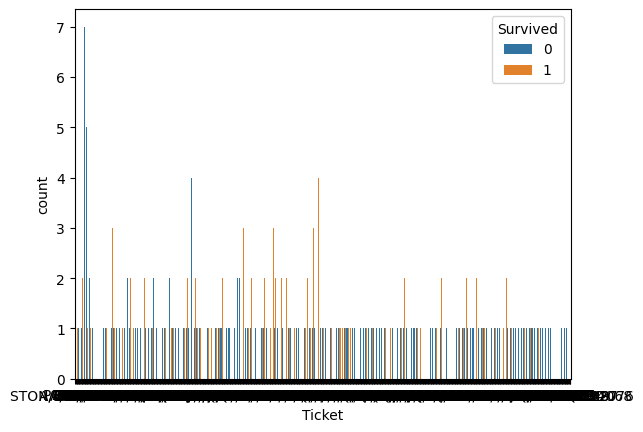

In [7]:
#TODO: candidate to target encoding
print('Number of unique levels:',len(titanic['Ticket'].unique()))
sns.countplot(x=titanic['Ticket'],data=titanic, hue = 'Survived')
#Show only a sample of the dataset 
#sam=titanic.sample(frac=0.01)
#sns.countplot(x=sam['Ticket'],data=sam, hue = 'Survived')


Survived passengers by ticket.

In [8]:
Ticket_Survived = titanic.pivot_table(index='Ticket', columns='Survived', aggfunc='size', fill_value=0)
Ticket_Survived.columns = ['Not Survived', 'Survived']
Ticket_Survived.head()

,Not Survived,Survived
Ticket,,
110152,0,3
110413,1,2
110465,2,0
110564,0,1
110813,0,1


In [9]:
print('p-value associated:',chi2_contingency(Ticket_Survived).pvalue)

p-value associated: 0.01152729601163775


It seems that depending on the ticket election, people could survive or not.

Number of unique levels: 148


<Axes: xlabel='Cabin', ylabel='count'>

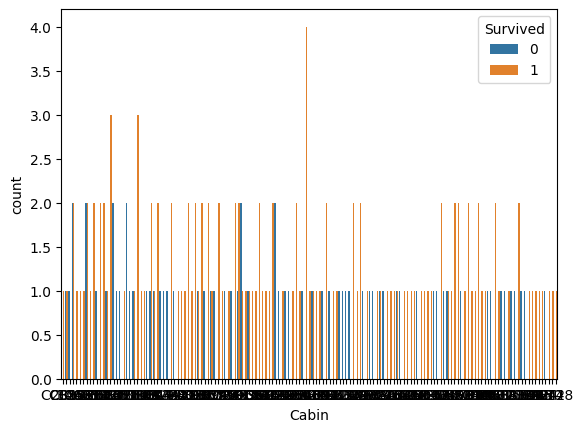

In [10]:
#TODO: candidate to target encoding
print('Number of unique levels:',len(titanic['Cabin'].unique()))
sns.countplot(x=titanic['Cabin'],data=titanic, hue = 'Survived')
#Show only a sample of the dataset 
#sam=titanic.sample(frac=0.01)
#sns.countplot(x=sam['Cabin'],data= sam, hue = 'Survived')

Survived passengers by cabin.

In [11]:
Cabin_Survived = titanic.pivot_table(index='Cabin', columns='Survived', aggfunc='size', fill_value=0)
Cabin_Survived.columns = ['Not Survived', 'Survived']
Cabin_Survived.head()

,Not Survived,Survived
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1


In [12]:
print('p-value associated:',chi2_contingency(Cabin_Survived).pvalue)

p-value associated: 0.18357354976388165


 No apparent relationship. 

<Axes: xlabel='Embarked', ylabel='count'>

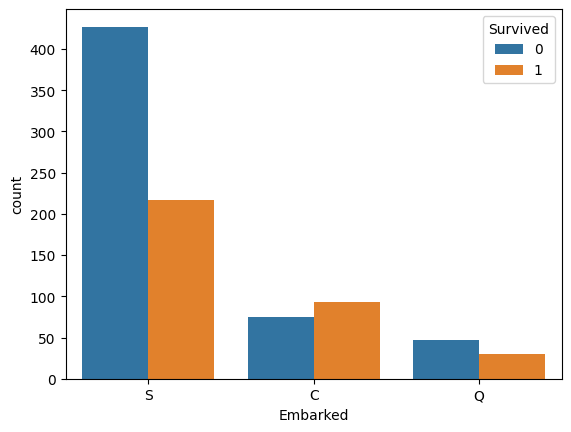

In [13]:
sns.countplot(x=titanic['Embarked'],data=titanic, hue = 'Survived')

In [14]:
chi2_contingency(titanic.pivot_table(index='Embarked', columns='Survived', aggfunc='size', fill_value=0)).pvalue

1.769922284120912e-06

 It seems that one places have more oportunities than others to survive. 

### Categorical variables with missing values. 

In [15]:
categorical_cols_with_missing = [col for col in categorical_cols
                     if titanic[col].isnull().any()]
print('Categorical variables with missing values:',categorical_cols_with_missing)
missing_val_count_by_column = titanic[categorical_cols].isnull().sum()
print('Number of NaN values in each categorical variable:\n',missing_val_count_by_column[missing_val_count_by_column > 0])

Categorical variables with missing values: ['Cabin', 'Embarked']
Number of NaN values in each categorical variable:
 Cabin       687
Embarked      2
dtype: int64


 'Cabin' has too much NaN values so we are going to ommit it from our analysis. 

In [16]:
categorical_cols.remove('Cabin')

**TODO**: imputate 'Embarked' and target encode 'Ticket'.

## Numerical 

In [17]:
titanic[numerical_cols]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [18]:
print(titanic['Pclass'].unique())
print(titanic['SibSp'].unique())
print(titanic['Parch'].unique())

[3 1 2]
[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


<Axes: xlabel='Pclass', ylabel='count'>

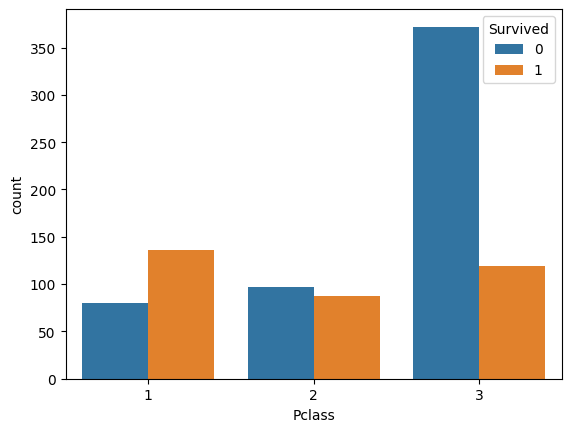

In [19]:
sns.countplot(data = titanic, x = titanic['Pclass'],hue = 'Survived')

In [20]:
chi2_contingency(titanic.pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)).pvalue

4.549251711298793e-23

It seems that the most not survivals belong to the third Pclass.

<Axes: xlabel='SibSp', ylabel='count'>

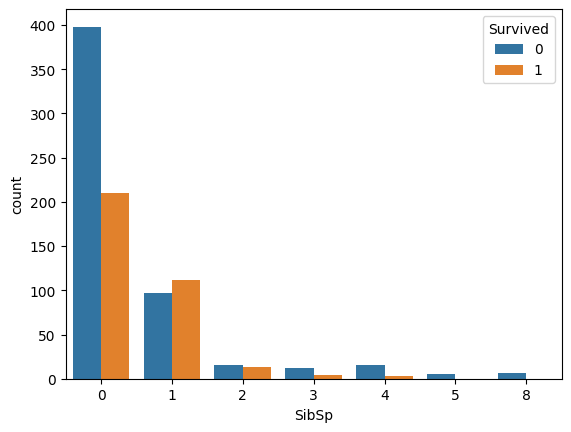

In [21]:
sns.countplot(data = titanic, x = titanic['SibSp'],hue = 'Survived')

In [22]:
chi2_contingency(titanic.pivot_table(index='SibSp', columns='Survived', aggfunc='size', fill_value=0)).pvalue

1.5585810465902147e-06

<Axes: xlabel='Parch', ylabel='count'>

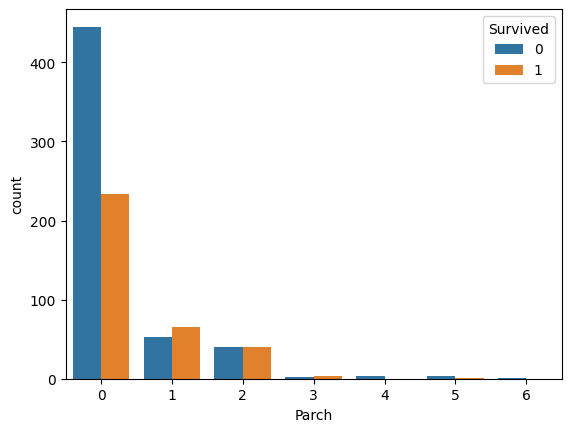

In [23]:
sns.countplot(data = titanic, x = titanic['Parch'],hue = 'Survived')

In [24]:
chi2_contingency(titanic.pivot_table(index='Parch', columns='Survived', aggfunc='size', fill_value=0)).pvalue

9.703526421039997e-05

<Axes: xlabel='Age', ylabel='Count'>

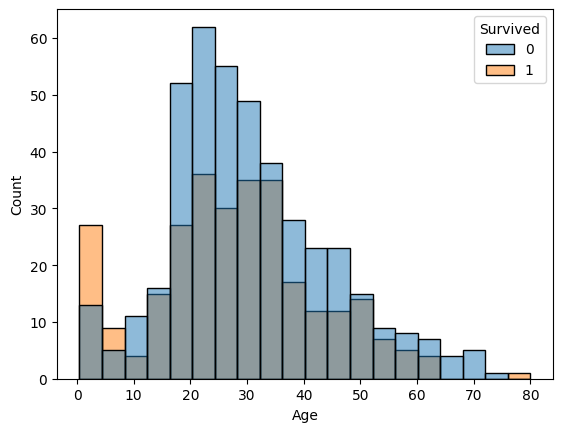

In [25]:
sns.histplot(data=titanic, x='Age', hue='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

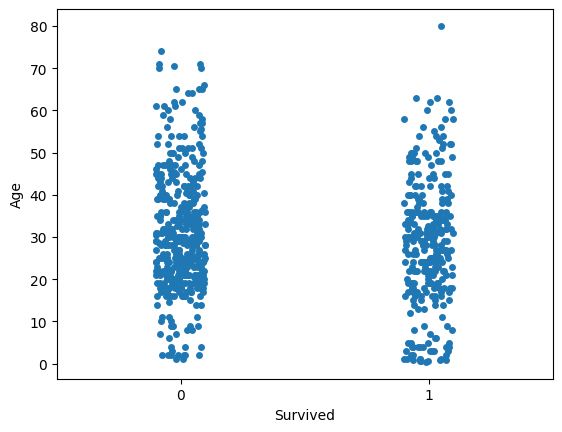

In [26]:
sns.stripplot(x=titanic['Survived'],
              y=titanic['Age'])

 Here we can see how childs were desired to survive; on the other hand, elder people, were not able to survive.

<Axes: xlabel='Fare', ylabel='Count'>

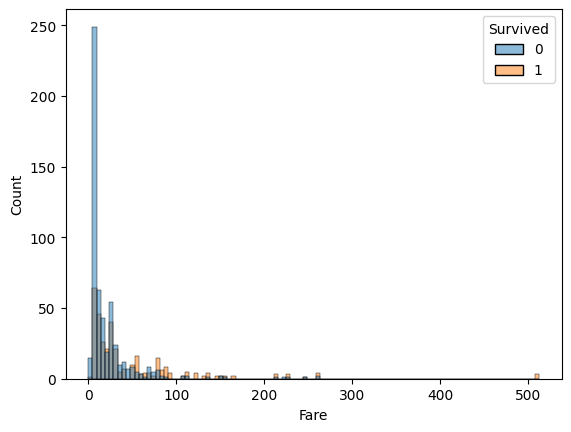

In [27]:
sns.histplot(data=titanic, x='Fare', hue='Survived')

 We can see that the more you pay, more possibilities to survive you had. 

<Axes: xlabel='Survived', ylabel='Fare'>

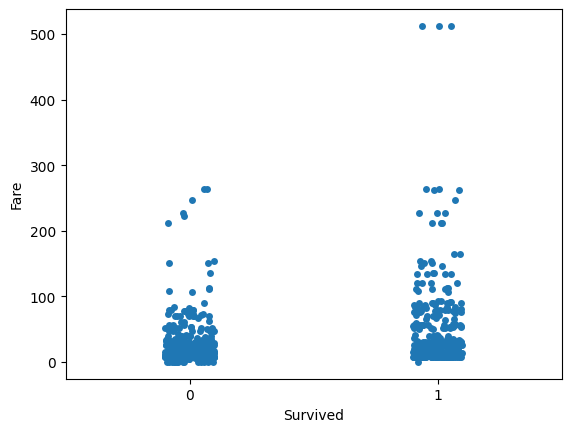

In [28]:
sns.stripplot(x=titanic['Survived'],
              y=titanic['Fare'])

### Numerical variables with missing values. 

In [29]:
numerical_cols_with_missing = [col for col in numerical_cols
                     if titanic[col].isnull().any()]
print('Numerical variables with missing values:',numerical_cols_with_missing)
missing_val_count_by_column = titanic[numerical_cols].isnull().sum()
print('Number of NaN values in each numerical variable:\n',missing_val_count_by_column[missing_val_count_by_column > 0])

Numerical variables with missing values: ['Age']
Number of NaN values in each numerical variable:
 Age    177
dtype: int64


**TODO**: imputate 'Age' variable. 

# Features selection

We can make this selection based on what we have seen in EDA.

In [30]:
#By this time we are going to not consider the variable ticket; when we finish our models, we are going to see if there exist some improvement
#on adding it
categorical_cols.remove('Ticket')
print(numerical_cols)
print(categorical_cols)
y = titanic.Survived
X = titanic[numerical_cols+categorical_cols]
X.head()

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Embarked']


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,male,S
1,1,38.0,1,0,71.2833,female,C
2,3,26.0,0,0,7.9250,female,S
3,1,35.0,1,0,53.1000,female,S
4,3,35.0,0,0,8.0500,male,S


# Data cleaning - preprocessing

### Manually

**IMPUTATION**

**Numerical**

**COPY OF THE ORIGINAL DATASET TO BE MODIFIED**

In [31]:
from sklearn.impute import SimpleImputer
X2 = X.copy()
my_imputer = SimpleImputer()
numerical_cols2 = [cname for cname in X2.columns if X2[cname].dtype in ['int64', 'float64']]

X2[numerical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[numerical_cols2]))
X2[numerical_cols2].columns = X[numerical_cols2].columns

print('BEFORE\n',X[numerical_cols2].isnull().sum())
print('AFTER\n',X2[numerical_cols2].isnull().sum())


BEFORE
 Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64
AFTER
 Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64


**Categorical**

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
categorical_cols2 = [cname for cname in X2.columns if X2[cname].dtype == "object"]
#This is important; we must imputate first before oneHotEncoding
print(X2[categorical_cols2].isnull().sum())
my_imputer = SimpleImputer(strategy='most_frequent')
X2[categorical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[categorical_cols2]))
X2[categorical_cols2].columns = X[categorical_cols2].columns
print(X2[categorical_cols2].isnull().sum())

Sex         0
Embarked    2
dtype: int64
Sex         0
Embarked    0
dtype: int64


**Mutual information** (revisiting)

**COPY OF THE COPY OF IMPUTED DATA TO CALCULATE MUTUAL INFORMATION**

In [33]:
# Label encoding for categoricals
X3 = X2.copy()
X3["Ticket_encoded"] = titanic.groupby("Ticket")["Survived"].transform("mean")
for colname in X3.select_dtypes("object"):
    X3[colname], _ = X3[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X3.dtypes == int
discrete_features

Pclass            False
Age               False
SibSp             False
Parch             False
Fare              False
Sex                True
Embarked           True
Ticket_encoded    False
dtype: bool

In [34]:
import numpy as np
np.random.seed(35643419)
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X3, y, discrete_features)
mi_scores  # show a few features with their MI scores

Ticket_encoded    0.561726
Sex               0.150870
Fare              0.138052
Pclass            0.050916
Age               0.028138
Parch             0.024901
Embarked          0.014233
SibSp             0.008167
Name: MI Scores, dtype: float64

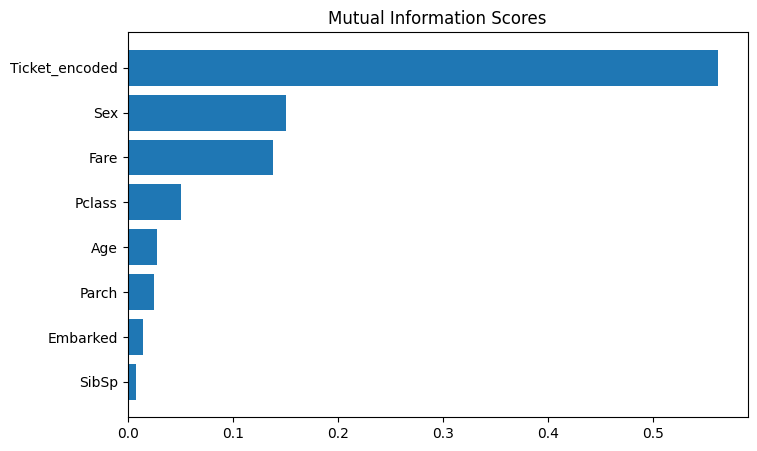

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

It is curious how mutual information does not take in account 'Parch' variable when we see with a chi-squared test that 'Survived' and it are related. Here we can see that 'Ticket_encoded' will present a problem probably in order to predict (it captures too much information).

**ONE HOT ENCODING**

In [36]:
# Create a OneHotEncoder instance
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Apply one-hot encoding to the selected columns and store in a new DataFrame
OH_cols = pd.DataFrame(OH_encoder.fit_transform(X2[categorical_cols2]))

OH_cols

# One-hot encoding removes the index. Add it back to the encoded DataFrame
OH_cols.index = X2.index
OH_cols
# Remove the original categorical columns from X2
X2.drop(categorical_cols2, axis=1, inplace=True)
#print('BEFORE\n',X2.head())
# Concatenate the one-hot encoded columns with the numerical columns in X2
X2 = pd.concat([X2, OH_cols], axis=1)
print('AFTER\n')
X2.head()


AFTER



,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


### Using pipelines

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

**TODO**: try to see what happens when we choose variables using mutual information.  

# Training and VALIDATION samples 

In [38]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 35643419)

# Models (using created pipeline)

**TODO**: 

1. Use neural networks. 

## Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_leaf_nodes=500,random_state=35643419)

from sklearn.metrics import accuracy_score

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', dtm)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)
#print(preds)

# Evaluate the model
score = accuracy_score(val_y, preds)
print('Score:', score)

Score: 0.7623318385650224


### Tuning 

In [40]:
def get_accuracy(max_leaf_nodes, train_X, val_X, train_y, val_y):
    dtm = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=35643419)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', dtm)
                             ])
    my_pipeline.fit(train_X, train_y)
    preds = my_pipeline.predict(val_X)
    accuracy = accuracy_score(val_y, preds)
    return(accuracy)

for max_leaf_nodes in [5, 50, 500, 5000]:
    print('max_leaf_nodes:',max_leaf_nodes,' accuracy:',get_accuracy(max_leaf_nodes, train_X, val_X, train_y, val_y))

max_leaf_nodes: 5  accuracy: 0.8116591928251121
max_leaf_nodes: 50  accuracy: 0.8116591928251121
max_leaf_nodes: 500  accuracy: 0.7623318385650224
max_leaf_nodes: 5000  accuracy: 0.7623318385650224


The best one is with max_leaf_nodes 50.

## Random forest 

Like we have the same results to 5 and 50 leaf nodes, to the random forest we are going to use them indifferently. 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfm = RandomForestClassifier(n_estimators=500,max_leaf_nodes=50,random_state=35643419)


# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rfm)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds_rf = my_pipeline.predict(val_X)
#print(preds_rf)

# Evaluate the model
score = accuracy_score(val_y, preds_rf)
print('Score:', score)

Score: 0.8116591928251121


### Tuning 

In [42]:
def get_accuracy(n_estimators, train_X, val_X, train_y, val_y):
    rfm = RandomForestClassifier(n_estimators=n_estimators,max_leaf_nodes=50,random_state=35643419)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rfm)
                             ])
    my_pipeline.fit(train_X, train_y)
    preds_rf = my_pipeline.predict(val_X)
    accuracy = accuracy_score(val_y, preds_rf)
    return(accuracy)

for n_estimators in [5, 50, 500, 5000]:
    print('n_estimators:',n_estimators,' accuracy:',get_accuracy(max_leaf_nodes, train_X, val_X, train_y, val_y))

n_estimators: 5  accuracy: 0.8161434977578476
n_estimators: 50  accuracy: 0.8161434977578476
n_estimators: 500  accuracy: 0.8161434977578476
n_estimators: 5000  accuracy: 0.8161434977578476


## XGBoost

**Version 1.0** (using pipelines and without early_stopping_rounds)

We fixed here 50 cause it is the value that gives to us better results; the same way with n_estimators.

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgbm = XGBClassifier(n_estimators=100,max_leaves=50,random_state=35643419)

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgbm)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds_xgb = my_pipeline.predict(val_X)
#print(preds_xgb)

# Evaluate the model
score = accuracy_score(val_y, preds_xgb)
print('Score:', score)


Score: 0.8340807174887892


**Best model**: 0.8341

# Models (using manually imputated data)

We are going to use the imputated data we have created manually. 

In [44]:
from sklearn.model_selection import train_test_split
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y, random_state = 35643419)

**Version 2.0** (including early_stopping_rounds)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgbm = XGBClassifier(n_estimators=1000,max_leaves=50,random_state=35643419,early_stopping_rounds=5)

# Preprocessing of training data, fit model 
xgbm.fit(train_X2, train_y2, eval_set=[(val_X2, val_y2)],verbose=False)

# Preprocessing of validation data, get predictions
preds_xgb2 = xgbm.predict(val_X2)
#print(preds_xgb)

# Evaluate the model
score = accuracy_score(val_y2, preds_xgb)
print('Score:', score)

Score: 0.8340807174887892


In [46]:
X4 = X2.copy()

### 'Ticket' variable encoding

Trying to introduce Ticket in the train dataset. 

In [47]:
X4["Ticket_encoded"] = titanic.groupby("Ticket")["Survived"].transform("mean")
X4

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4,Ticket_encoded
0,3.0,22.000000,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,1.0
2,3.0,26.000000,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.5
4,3.0,35.000000,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2.0,27.000000,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,19.000000,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0
888,3.0,29.699118,1.0,2.0,23.4500,1.0,0.0,0.0,0.0,1.0,0.0
889,1.0,26.000000,0.0,0.0,30.0000,0.0,1.0,1.0,0.0,0.0,1.0


In [48]:
from sklearn.model_selection import train_test_split
# !!!! Important 
X4.columns = X4.columns.astype(str)
train_X2, val_X2, train_y2, val_y2 = train_test_split(X4, y, random_state = 35643419)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# XGBOOST
xgbm = XGBClassifier(n_estimators=1000,max_leaves=50,random_state=35643419,early_stopping_rounds=5)

# Preprocessing of training data, fit model 
xgbm.fit(train_X2, train_y2, eval_set=[(val_X2, val_y2)],verbose=False)

# Preprocessing of validation data, get predictions
preds_xgb2 = xgbm.predict(val_X2)
#print(preds_xgb)

# Evaluate the model
score = accuracy_score(val_y2, preds_xgb)
print('Score:', score)


Score: 0.8340807174887892


In [49]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(n_estimators=500,max_leaf_nodes=50,random_state=35643419)

# Preprocessing of training data, fit model 
rfm.fit(train_X2, train_y2)

# Preprocessing of validation data, get predictions
preds_rf = rfm.predict(val_X2)
#print(preds_rf)

# Evaluate the model
score = accuracy_score(val_y2, preds_rf)
print('Score:', score)

Score: 0.9865470852017937


In [50]:
from sklearn.tree import DecisionTreeClassifier

dtm = DecisionTreeClassifier(max_leaf_nodes=500,random_state=35643419)

from sklearn.metrics import accuracy_score

# Preprocessing of training data, fit model 
dtm.fit(train_X2, train_y2)

# Preprocessing of validation data, get predictions
preds = dtm.predict(val_X2)

# Evaluate the model
score = accuracy_score(val_y2, preds)
print('Score:', score)

Score: 0.9910313901345291


 This from here probably is related to the use of 'Survived' to create 'Ticket_encoded'. 

# Submission to competition

We are going to use all the knowledge we have acquired in past sections. 

In [51]:
import pandas as pd
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

### Train data 

In [52]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
y = train_data.Survived
X = train_data[features]
X.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


**Imputation** (categorical and numerical variables)

In [53]:
from sklearn.impute import SimpleImputer
X2 = X.copy()
my_imputer = SimpleImputer()
numerical_cols2 = [cname for cname in X2.columns if X2[cname].dtype in ['int64', 'float64']]
print(X[numerical_cols2].isnull().sum())

X2[numerical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[numerical_cols2]))
X2[numerical_cols2].columns = X[numerical_cols2].columns

print(X2[numerical_cols2].isnull().sum())

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
categorical_cols2 = [cname for cname in X2.columns if X2[cname].dtype == "object"]
print(X2[categorical_cols2].isnull().sum())
my_imputer = SimpleImputer(strategy='most_frequent')
X2[categorical_cols2] = pd.DataFrame(my_imputer.fit_transform(X2[categorical_cols2]))
X2[categorical_cols2].columns = X[categorical_cols2].columns
print(X2[categorical_cols2].isnull().sum())

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
Sex         0
Embarked    2
dtype: int64
Sex         0
Embarked    0
dtype: int64


**One hot encoding** 

In [54]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(X2[categorical_cols2]))

OH_cols.index = X2.index

X2.drop(categorical_cols2, axis=1, inplace=True)

X2 = pd.concat([X2, OH_cols], axis=1)

X2.columns = X2.columns.astype(str)

print('AFTER\n')
X2.head()

AFTER



,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0


### Test data 

In [55]:
Xt = test_data[features]
Xt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


**Imputation**

In [56]:
from sklearn.impute import SimpleImputer
Xt2 = Xt.copy()
my_imputer = SimpleImputer()
numerical_cols2 = [cname for cname in Xt2.columns if Xt2[cname].dtype in ['int64', 'float64']]
print(Xt2[numerical_cols2].isnull().sum())

Xt2[numerical_cols2] = pd.DataFrame(my_imputer.fit_transform(Xt2[numerical_cols2]))
Xt2[numerical_cols2].columns = Xt[numerical_cols2].columns

print(Xt2[numerical_cols2].isnull().sum())

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
categorical_cols2 = [cname for cname in Xt2.columns if Xt2[cname].dtype == "object"]
print(Xt2[categorical_cols2].isnull().sum())
my_imputer = SimpleImputer(strategy='most_frequent')
Xt2[categorical_cols2] = pd.DataFrame(my_imputer.fit_transform(Xt2[categorical_cols2]))
Xt2[categorical_cols2].columns = Xt[categorical_cols2].columns
print(Xt2[categorical_cols2].isnull().sum())

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64
Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64
Sex         0
Embarked    0
dtype: int64
Sex         0
Embarked    0
dtype: int64


**One hot encoding**

In [57]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(Xt2[categorical_cols2]))

OH_cols.index = Xt2.index

Xt2.drop(categorical_cols2, axis=1, inplace=True)

Xt2 = pd.concat([Xt2, OH_cols], axis=1)

Xt2.columns = Xt2.columns.astype(str)

print('AFTER\n')
Xt2.head()

AFTER



,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,3.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0


## Fitting model 

Right now we can not train the estimators well because we do not have an eval_set to work with. 

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgbm = XGBClassifier(n_estimators=100,max_leaves=50,random_state=35643419)

xgbm.fit(X2, y)

preds_xgb = xgbm.predict(Xt2)

### Saving predictions 

In [59]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': preds_xgb})
output.to_csv('submission.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
